In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numba import njit 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


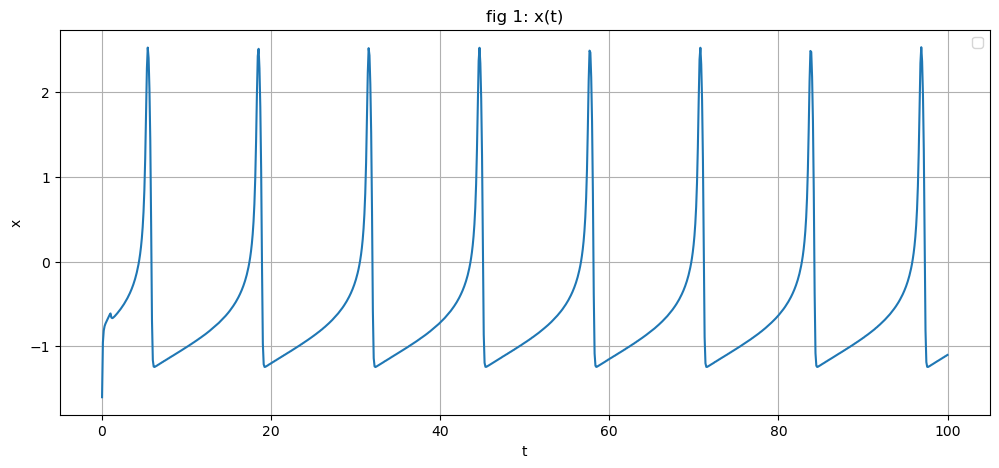

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


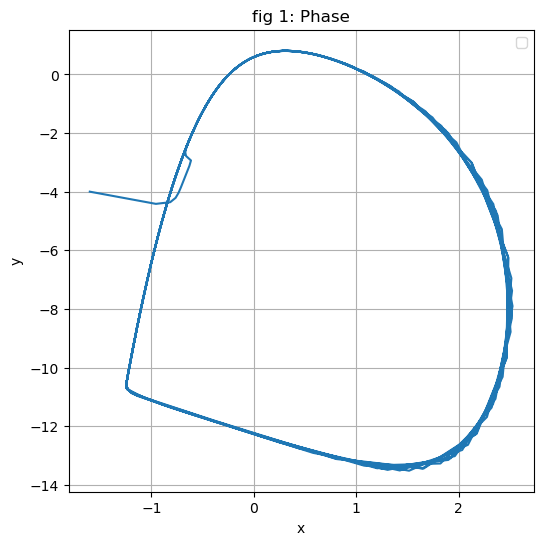

In [57]:

#1  

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# Parameters
# a = 1.0
# b = 3
# c = 1
# d = 5

a, b, c, d = 1.5, 5, 1.5, 7

pulse_duration = 1.0
pulse_amplitude = 1
# current pulse as a function of time
def current_pulse(t):
    return pulse_amplitude if 0 <= t <= pulse_duration else 0
# system of ODEs
def system(t, z):
    x, y = z
    I = current_pulse(t)
    dxdt = y- a * x**3 + b * x**2 + I
    dydt = c- d * x**2- y
    return [dxdt, dydt]
# Initial conditions
x0 =-1.6
y0 =-4
z0 = [x0, y0]
# Time span for the simulation
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
# Solve the system of ODEs
solution = solve_ivp(system, t_span, z0, t_eval=t_eval)
# Extract the results

t = solution.t
x = solution.y[0]
y = solution.y[1]
# Plot x(t)
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.title("fig 1: x(t)")
plt.grid()
plt.legend()
plt.savefig("fig1_1.png")
plt.show()
# Plot the phase plane (x-y)
plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("fig 1: Phase")
plt.grid()
plt.legend()
plt.savefig("fig1_2.png")
plt.show()




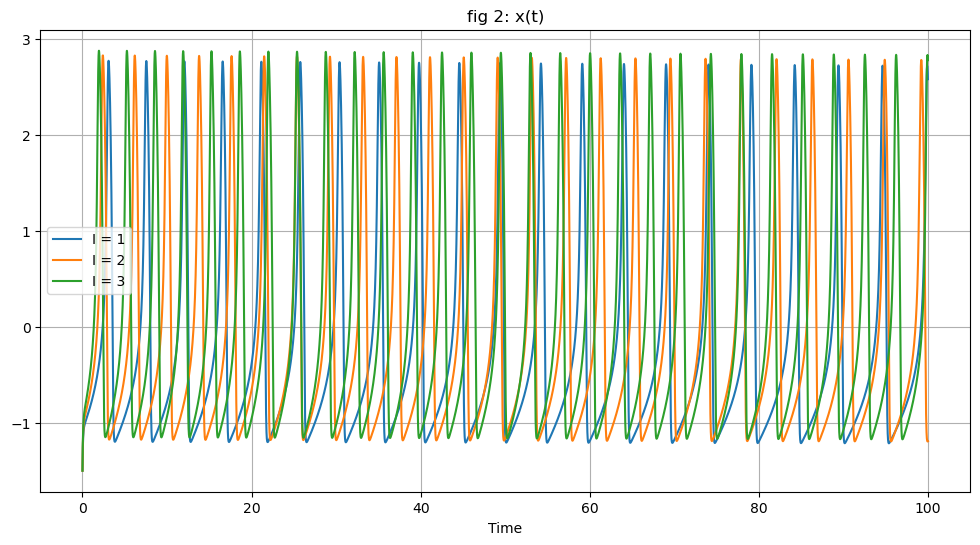

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


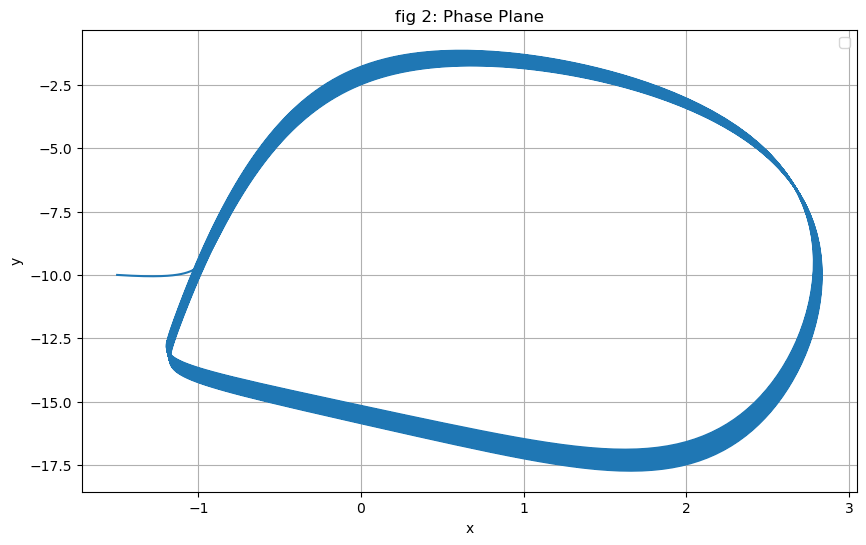

In [60]:

#2 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# پارامترهای مدل
a, b, c, d = 1.5, 5, 1.5, 7
r, s, x_R = 0.001, 4.0, -2.0
I_values = [1, 2, 3]  # مقادیر مختلف I برای شبیه‌سازی
dt = 0.01
T = 100
time = np.arange(0, T, dt)

# تابع مدل Hindmarsh-Rose
def hindmarsh_rose(x, y, z, a, b, c, d, r, s, x_R, I):
    dx = y - a * x**3 + b * x**2 - z + I
    dy = c - d * x**2 - y
    dz = r * (s * (x - x_R) - z)
    return dx, dy, dz

# حل معادلات با روش RK4
def solve_hr(I, x0=-1.5, y0=-10.0, z0=-2.0):
    x, y, z = x0, y0, z0
    x_values, y_values, z_values = [], [], []
    for t in time:
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)

        k1_x, k1_y, k1_z = hindmarsh_rose(x, y, z, a, b, c, d, r, s, x_R, I)
        k2_x, k2_y, k2_z = hindmarsh_rose(x + dt/2 * k1_x, y + dt/2 * k1_y, z + dt/2 * k1_z, a, b, c, d, r, s, x_R, I)
        k3_x, k3_y, k3_z = hindmarsh_rose(x + dt/2 * k2_x, y + dt/2 * k2_y, z + dt/2 * k2_z, a, b, c, d, r, s, x_R, I)
        k4_x, k4_y, k4_z = hindmarsh_rose(x + dt * k3_x, y + dt * k3_y, z + dt * k3_z, a, b, c, d, r, s, x_R, I)

        x += dt / 6 * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y += dt / 6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        z += dt / 6 * (k1_z + 2*k2_z + 2*k3_z + k4_z)
    return np.array(x_values), np.array(y_values), np.array(z_values)

# 1. شبیه‌سازی دینامیک زمانی برای شکل 3
plt.figure(figsize=(12, 6))
for I in I_values:
    x_values, _, _ = solve_hr(I)
    plt.plot(time, x_values, label=f"I = {I}")
plt.xlabel("Time")
#plt.ylabel("x (Membrane Potential)")
plt.title("fig 2: x(t)")
plt.legend()
plt.grid()
plt.savefig("fig2_1.png")
plt.show()

# 2. صفحه فازی (x-y) برای شکل 4
plt.figure(figsize=(10, 6))
x_values, y_values, _ = solve_hr(I_values[1])  # استفاده از I = 2.0
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.title("fig 2: Phase Plane")
plt.legend()
plt.grid()
plt.savefig("fig2_2.png")
plt.show()




/home/alireza-astane/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


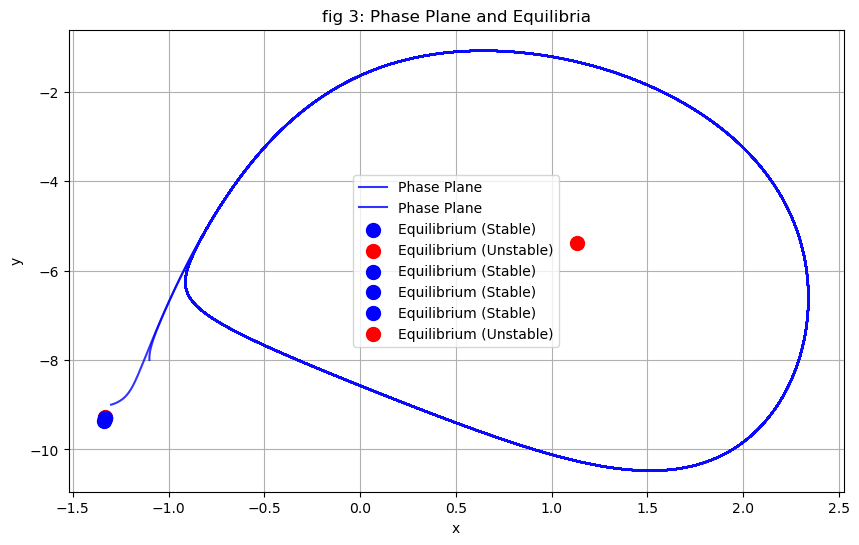

For I = 3:
Equilibrium Point 1: (x, y) = [-1.33336354 -9.29667227], Stability: Stable
Equilibrium Point 2: (x, y) = [-1.33244199 -9.28416753], Stability: Unstable
Equilibrium Point 3: (x, y) = [-1.33353819 -9.30138672], Stability: Stable
Equilibrium Point 4: (x, y) = [-1.3336195 -9.3000828], Stability: Stable
Equilibrium Point 5: (x, y) = [-1.33774206 -9.3538906 ], Stability: Stable
Equilibrium Point 6: (x, y) = [ 1.13039543 -5.38896919], Stability: Unstable


In [61]:

### 3 

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy.linalg import eig

# پارامترهای مدل
a = 1.0
b = 3
c = 1
d = 5

# a, b, c, d = 1.5, 5, 1.5, 7




I = 3 # مقدار جریان ورودی برای سه نقطه تعادل
dt = 0.01
T = 100
time = np.arange(0, T, dt)

# تابع مدل Hindmarsh-Rose برای دو معادله
def hindmarsh_rose_2d(x, y, a, b, c, d, I):
    dx = y - a * x**3 + b * x**2 + I
    dy = c - d * x**2 - y
    return dx, dy

# معادلات برای محاسبه نقاط تعادل
def equilibrium_equations_2d(vars, I):
    x, y = vars
    eq1 = y - a * x**3 + b * x**2 + I
    eq2 = c - d * x**2 - y
    return [eq1, eq2]

# ماتریس ژاکوبین برای دو معادله
def jacobian_matrix_2d(x, y):
    J = np.array([
        [-3 * a * x**2 + 2 * b * x, 1],
        [-2 * d * x, -1]
    ])
    return J

# حل معادلات برای نقاط تعادل
def find_equilibria_2d(I):
    equilibria = []
    guesses = np.linspace(-3, 3, 10)  # حدس اولیه
    for guess in guesses:
        try:
            sol = fsolve(equilibrium_equations_2d, [guess, c - d * guess**2], args=(I,))
            if not any(np.allclose(sol, eq, atol=1e-3) for eq in equilibria):  # بررسی یکتا بودن
                equilibria.append(sol)
        except:
            continue
    return equilibria

# بررسی پایداری نقاط تعادل
def analyze_stability_2d(equilibria):
    stability = []
    for eq in equilibria:
        x, y = eq
        J = jacobian_matrix_2d(x, y)
        eigenvalues = eig(J)[0]
        if all(np.real(eigenvalues) < 0):
            stability.append("Stable")
        else:
            stability.append("Unstable")
    return stability

# حل معادلات دینامیکی با روش RK4
def solve_hr_2d(I, x0=-1.1, y0=-8):
    x, y = x0, y0
    x_values, y_values = [], []
    for t in time:
        x_values.append(x)
        y_values.append(y)

        k1_x, k1_y = hindmarsh_rose_2d(x, y, a, b, c, d, I)
        k2_x, k2_y = hindmarsh_rose_2d(x + dt/2 * k1_x, y + dt/2 * k1_y, a, b, c, d, I)
        k3_x, k3_y = hindmarsh_rose_2d(x + dt/2 * k2_x, y + dt/2 * k2_y, a, b, c, d, I)
        k4_x, k4_y = hindmarsh_rose_2d(x + dt * k3_x, y + dt * k3_y, a, b, c, d, I)

        x += dt / 6 * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y += dt / 6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    return np.array(x_values), np.array(y_values)

# شبیه‌سازی صفحه فازی و نمایش نقاط تعادل
plt.figure(figsize=(10, 6))
x_values, y_values = solve_hr_2d(I)

# رسم صفحه فازی
plt.plot(x_values, y_values, label="Phase Plane", alpha=0.8 , color = "blue")

x_values, y_values = solve_hr_2d(I, x0=-1.3 , y0=-9)

# رسم صفحه فازی
plt.plot(x_values, y_values, label="Phase Plane", alpha=0.8 , color = "blue")

# یافتن نقاط تعادل
equilibria = find_equilibria_2d(I)
stability = analyze_stability_2d(equilibria)

# نمایش نقاط تعادل روی نمودار
for i, eq in enumerate(equilibria):
    x, y = eq
    plt.scatter(x, y, color='red' if stability[i] == "Unstable" else 'blue', s=100, label=f"Equilibrium ({stability[i]})")
    # plt.text(x, y, f"({x:.2f}, {y:.2f})", fontsize=9)

plt.xlabel("x")
plt.ylabel("y")
plt.title("fig 3: Phase Plane and Equilibria")
plt.legend()
plt.grid()
plt.savefig("fig3.png")
plt.show()

# چاپ نقاط تعادل و پایداری آنها
print(f"For I = {I}:")
for i, eq in enumerate(equilibria):
    print(f"Equilibrium Point {i+1}: (x, y) = {eq}, Stability: {stability[i]}")


/home/alireza-astane/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


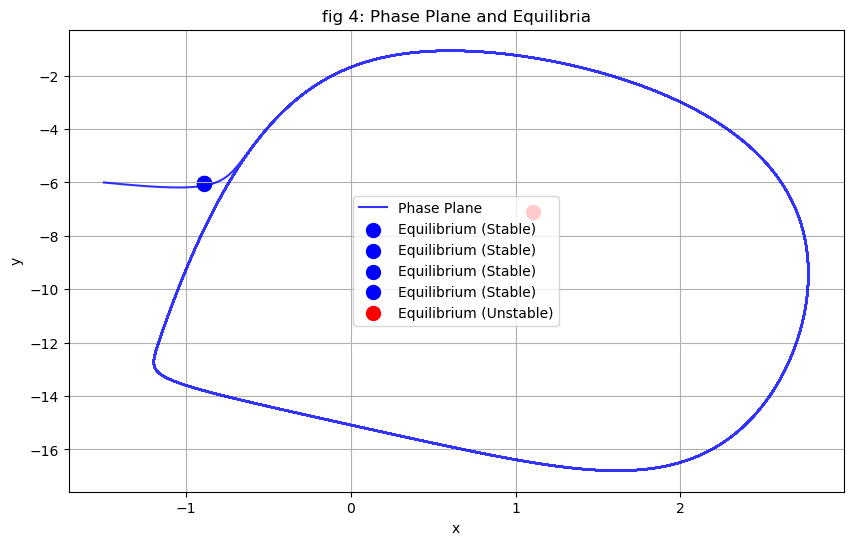

For I = 3:
Equilibrium Point 1: (x, y) = [-0.88910464 -6.02018811], Stability: Stable
Equilibrium Point 2: (x, y) = [-0.88959463 -6.02743428], Stability: Stable
Equilibrium Point 3: (x, y) = [-0.88945261 -6.02425868], Stability: Stable
Equilibrium Point 4: (x, y) = [-0.89118411 -6.04747636], Stability: Stable
Equilibrium Point 5: (x, y) = [ 1.10843119 -7.10033791], Stability: Unstable


In [62]:

### 4

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy.linalg import eig

# پارامترهای مدل

a, b, c, d = 1.5, 5, 1.5, 7




I = 3 # مقدار جریان ورودی برای سه نقطه تعادل
dt = 0.01
T = 100
time = np.arange(0, T, dt)

# تابع مدل Hindmarsh-Rose برای دو معادله
def hindmarsh_rose_2d(x, y, a, b, c, d, I):
    dx = y - a * x**3 + b * x**2 + I
    dy = c - d * x**2 - y
    return dx, dy

# معادلات برای محاسبه نقاط تعادل
def equilibrium_equations_2d(vars, I):
    x, y = vars
    eq1 = y - a * x**3 + b * x**2 + I
    eq2 = c - d * x**2 - y
    return [eq1, eq2]

# ماتریس ژاکوبین برای دو معادله
def jacobian_matrix_2d(x, y):
    J = np.array([
        [-3 * a * x**2 + 2 * b * x, 1],
        [-2 * d * x, -1]
    ])
    return J

# حل معادلات برای نقاط تعادل
def find_equilibria_2d(I):
    equilibria = []
    guesses = np.linspace(-3, 3, 10)  # حدس اولیه
    for guess in guesses:
        try:
            sol = fsolve(equilibrium_equations_2d, [guess, c - d * guess**2], args=(I,))
            if not any(np.allclose(sol, eq, atol=1e-3) for eq in equilibria):  # بررسی یکتا بودن
                equilibria.append(sol)
        except:
            continue
    return equilibria

# بررسی پایداری نقاط تعادل
def analyze_stability_2d(equilibria):
    stability = []
    for eq in equilibria:
        x, y = eq
        J = jacobian_matrix_2d(x, y)
        eigenvalues = eig(J)[0]
        if all(np.real(eigenvalues) < 0):
            stability.append("Stable")
        else:
            stability.append("Unstable")
    return stability

# حل معادلات دینامیکی با روش RK4
def solve_hr_2d(I, x0=-1.1, y0=-8):
    x, y = x0, y0
    x_values, y_values = [], []
    for t in time:
        x_values.append(x)
        y_values.append(y)

        k1_x, k1_y = hindmarsh_rose_2d(x, y, a, b, c, d, I)
        k2_x, k2_y = hindmarsh_rose_2d(x + dt/2 * k1_x, y + dt/2 * k1_y, a, b, c, d, I)
        k3_x, k3_y = hindmarsh_rose_2d(x + dt/2 * k2_x, y + dt/2 * k2_y, a, b, c, d, I)
        k4_x, k4_y = hindmarsh_rose_2d(x + dt * k3_x, y + dt * k3_y, a, b, c, d, I)

        x += dt / 6 * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y += dt / 6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    return np.array(x_values), np.array(y_values)

# شبیه‌سازی صفحه فازی و نمایش نقاط تعادل
plt.figure(figsize=(10, 6))
x_values, y_values = solve_hr_2d(I)

# رسم صفحه فازی
# plt.plot(x_values, y_values, label="Phase Plane", alpha=0.8 , color = "blue")

x_values, y_values = solve_hr_2d(I, x0=-1.5 , y0=-6)

# رسم صفحه فازی
plt.plot(x_values, y_values, label="Phase Plane", alpha=0.8 , color = "blue")

# یافتن نقاط تعادل
equilibria = find_equilibria_2d(I)
stability = analyze_stability_2d(equilibria)

# نمایش نقاط تعادل روی نمودار
for i, eq in enumerate(equilibria):
    x, y = eq
    plt.scatter(x, y, color='red' if stability[i] == "Unstable" else 'blue', s=100, label=f"Equilibrium ({stability[i]})")
    # plt.text(x, y, f"({x:.2f}, {y:.2f})", fontsize=9)

plt.xlabel("x")
plt.ylabel("y")
plt.title("fig 4: Phase Plane and Equilibria")
plt.legend()
plt.grid()
plt.savefig("fig4.png")
plt.show()

# چاپ نقاط تعادل و پایداری آنها
print(f"For I = {I}:")
for i, eq in enumerate(equilibria):
    print(f"Equilibrium Point {i+1}: (x, y) = {eq}, Stability: {stability[i]}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


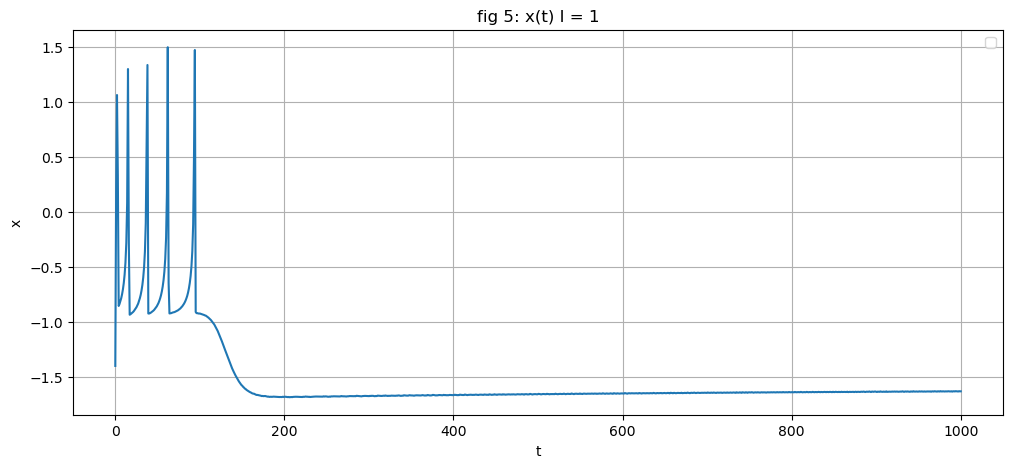

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


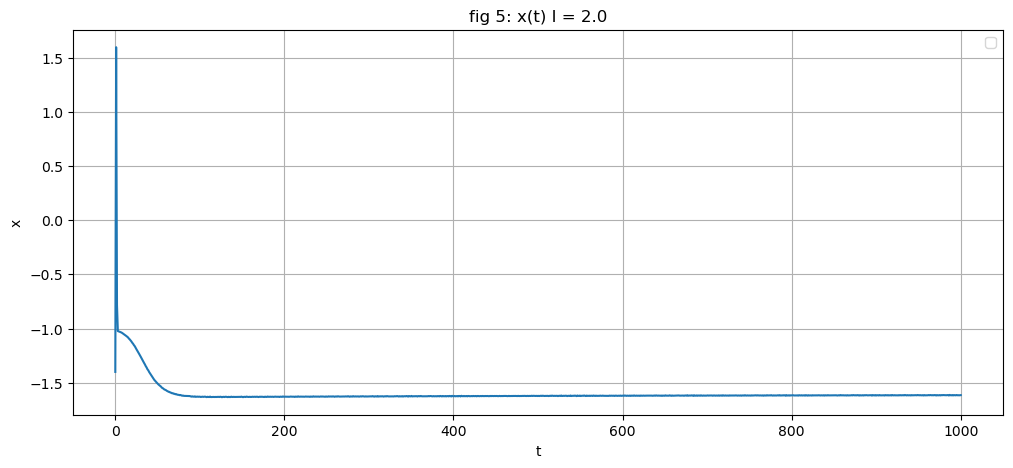

In [64]:
#5 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 1.0  
b = 3  
c = 1.0 
d = 5  
r = 0.001  
s = 1.0  
x1 = -1.6  
pulse_duration = 1.0  
pulse_amplitude = 1

def current_pulse(t):
    return pulse_amplitude if 0 <= t <= pulse_duration else 0

# system of ODEs
def system(t, z):
    x, y, z_val = z
    I = current_pulse(t)
    dxdt = y - a * x**3 + b * x**2 + I - z_val
    dydt = c - d * x**2 - y
    dzdt = r * (s * (x - x1) - z_val)
    return [dxdt, dydt, dzdt]

# Initial conditions
x0 = -1.4
y0 = 0.0
z0 = 0.0
z_initial = [x0, y0, z0]

# Time span for the simulation
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(system, t_span, z_initial, t_eval=t_eval)

# Extract the results
t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

# Plot x(t)
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.title(f"fig 5: x(t) I = {pulse_amplitude}")
plt.grid()
plt.legend()
plt.savefig("fig5_1.png")
plt.show()



#5

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 1.0  
b = 3  
c = 1.0 
d = 5  
r = 0.001  
s = 1.0  
x1 = -1.6  
pulse_duration = 1.0  
pulse_amplitude = 2.0  

def current_pulse(t):
    return pulse_amplitude if 0 <= t <= pulse_duration else 0

# system of ODEs
def system(t, z):
    x, y, z_val = z
    I = current_pulse(t)
    dxdt = y - a * x**3 + b * x**2 + I - z_val
    dydt = c - d * x**2 - y
    dzdt = r * (s * (x - x1) - z_val)
    return [dxdt, dydt, dzdt]

# Initial conditions
x0 = -1.4
y0 = 0.0
z0 = 0.0
z_initial = [x0, y0, z0]

# Time span for the simulation
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(system, t_span, z_initial, t_eval=t_eval)

# Extract the results
t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

# Plot x(t)
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.title(f"fig 5: x(t) I = {pulse_amplitude}")
plt.grid()
plt.legend()
plt.savefig("fig5_2.png")
plt.show()






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


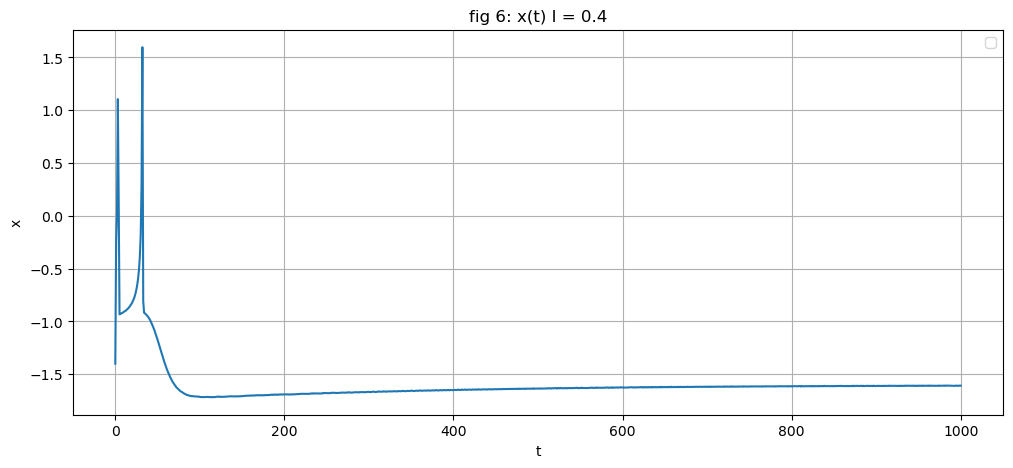

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


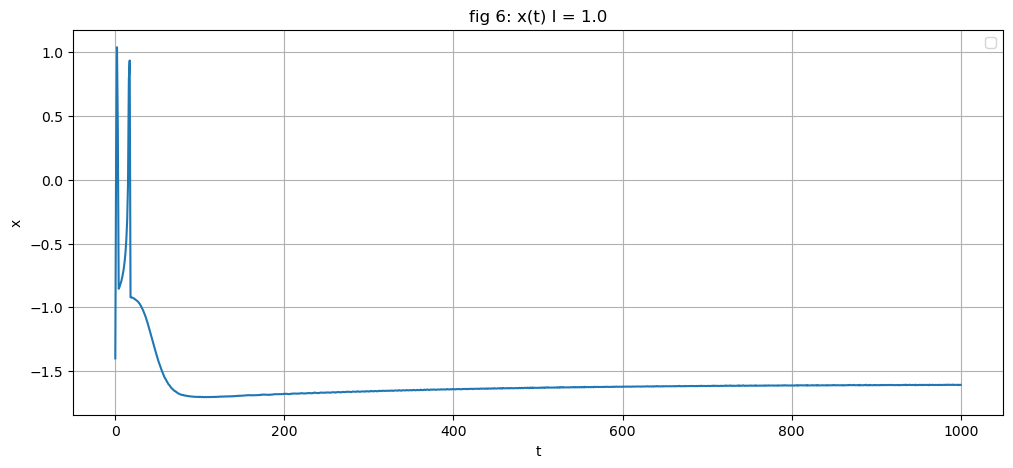

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


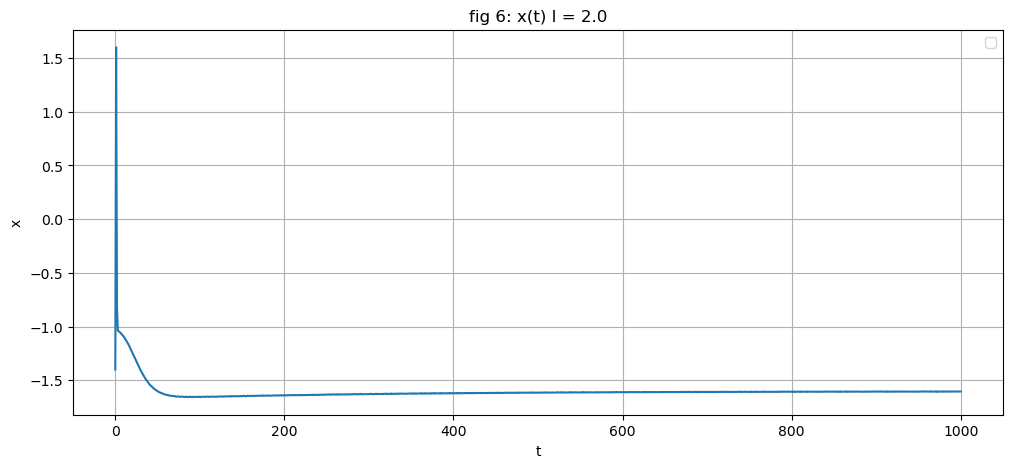

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


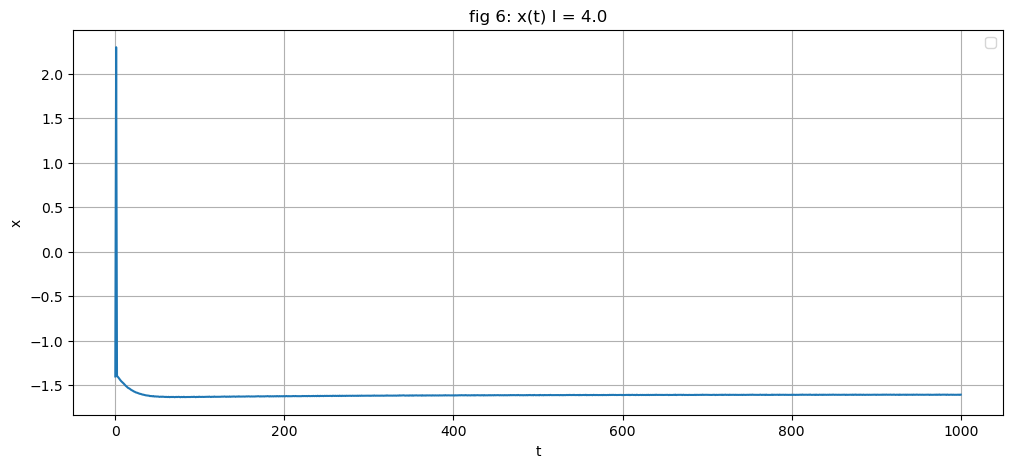

In [65]:
#6 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 1.0  
b = 3  
c = 1.0 
d = 5  
r = 0.001  
s = 4.0  
x1 = -1.6  
pulse_duration = 1.0  
pulse_amplitude = 0.4  

def current_pulse(t):
    return pulse_amplitude if 0 <= t <= pulse_duration else 0

# system of ODEs
def system(t, z):
    x, y, z_val = z
    I = current_pulse(t)
    dxdt = y - a * x**3 + b * x**2 + I - z_val
    dydt = c - d * x**2 - y
    dzdt = r * (s * (x - x1) - z_val)
    return [dxdt, dydt, dzdt]

# Initial conditions
x0 = -1.4
y0 = 0.0
z0 = 0.0
z_initial = [x0, y0, z0]

# Time span for the simulation
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(system, t_span, z_initial, t_eval=t_eval)

# Extract the results
t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

# Plot x(t)
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.title(f"fig 6: x(t) I = {pulse_amplitude}")
plt.grid()
plt.legend()
plt.savefig("fig6_1.png")

plt.show()



#6 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 1.0  
b = 3  
c = 1.0 
d = 5  
r = 0.001  
s = 4.0  
x1 = -1.6  
pulse_duration = 1.0  
pulse_amplitude = 1.0  

def current_pulse(t):
    return pulse_amplitude if 0 <= t <= pulse_duration else 0

# system of ODEs
def system(t, z):
    x, y, z_val = z
    I = current_pulse(t)
    dxdt = y - a * x**3 + b * x**2 + I - z_val
    dydt = c - d * x**2 - y
    dzdt = r * (s * (x - x1) - z_val)
    return [dxdt, dydt, dzdt]

# Initial conditions
x0 = -1.4
y0 = 0.0
z0 = 0.0
z_initial = [x0, y0, z0]

# Time span for the simulation
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(system, t_span, z_initial, t_eval=t_eval)

# Extract the results
t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

# Plot x(t)
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.title(f"fig 6: x(t) I = {pulse_amplitude}")
plt.grid()
plt.legend()
plt.savefig("fig6_2.png")

plt.show()


#6 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 1.0  
b = 3  
c = 1.0 
d = 5  
r = 0.001  
s = 4.0  
x1 = -1.6  
pulse_duration = 1.0  
pulse_amplitude = 2.0  

def current_pulse(t):
    return pulse_amplitude if 0 <= t <= pulse_duration else 0

# system of ODEs
def system(t, z):
    x, y, z_val = z
    I = current_pulse(t)
    dxdt = y - a * x**3 + b * x**2 + I - z_val
    dydt = c - d * x**2 - y
    dzdt = r * (s * (x - x1) - z_val)
    return [dxdt, dydt, dzdt]

# Initial conditions
x0 = -1.4
y0 = 0.0
z0 = 0.0
z_initial = [x0, y0, z0]

# Time span for the simulation
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(system, t_span, z_initial, t_eval=t_eval)

# Extract the results
t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

# Plot x(t)
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.title(f"fig 6: x(t) I = {pulse_amplitude}")
plt.grid()
plt.legend()
plt.savefig("fig6_3.png")
plt.show()


#6 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 1.0  
b = 3  
c = 1.0 
d = 5  
r = 0.001  
s = 4.0  
x1 = -1.6  
pulse_duration = 1.0  
pulse_amplitude = 4.0  

def current_pulse(t):
    return pulse_amplitude if 0 <= t <= pulse_duration else 0

# system of ODEs
def system(t, z):
    x, y, z_val = z
    I = current_pulse(t)
    dxdt = y - a * x**3 + b * x**2 + I - z_val
    dydt = c - d * x**2 - y
    dzdt = r * (s * (x - x1) - z_val)
    return [dxdt, dydt, dzdt]

# Initial conditions
x0 = -1.4
y0 = 0.0
z0 = 0.0
z_initial = [x0, y0, z0]

# Time span for the simulation
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(system, t_span, z_initial, t_eval=t_eval)

# Extract the results
t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

# Plot x(t)
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.title(f"fig 6: x(t) I = {pulse_amplitude}")
plt.grid()
plt.legend()
plt.savefig("fig6_4.png")
plt.show()



